In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir(r'C:\Users\aciag\ih\Week4_project\data\terror_db')

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')

C:\Users\aciag\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
df.shape

(181691, 135)

In [5]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
#percent_missing = pd.DataFrame((df.isnull().sum() * 100 / len(df)).sort_values(ascending=False))
#percent_missing

In [7]:
## instread of dropping tons of columns and data, going to select only those rows that have Ukraine in country column

dfu=df.loc[df['country_txt'] == 'Ukraine']

In [8]:
dfu.shape

(1709, 135)

In [9]:
dfu.isna().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    1498
              ... 
INT_LOG          0
INT_IDEO         0
INT_MISC         0
INT_ANY          0
related       1327
Length: 135, dtype: int64

In [10]:
#drop_cols=pd.DataFrame(dfu.isnull().sum() * 100 / len(dfu))
#drop_cols=drop_cols[drop_cols > 20]
#print(drop_cols)

##drop_cols=drop_cols.columns.tolist()

In [11]:
dfu = dfu.replace({'':np.nan})
dfu = dfu.dropna(thresh=0.10*len(dfu), axis=1)
dfu

,eventid,iyear,imonth,iday,approxdate,extended,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
49249,199111270012,1991,11,27,NaN,0,214,Ukraine,9,Eastern Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
49320,199112010015,1991,12,1,NaN,0,214,Ukraine,9,Eastern Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
50833,199203300016,1992,3,30,NaN,0,214,Ukraine,9,Eastern Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
54892,199401180002,1994,1,18,NaN,0,214,Ukraine,9,Eastern Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
56369,199405210002,1994,5,21,NaN,0,214,Ukraine,9,Eastern Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181020,201712030020,2017,12,3,NaN,0,214,Ukraine,9,Eastern Europe,...,NaN,"""Donetsk filtration station suffers another sh...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181191,201712090027,2017,12,10,NaN,0,214,Ukraine,9,Eastern Europe,...,NaN,"""Blast hits Polish tourist bus in Ukraine ahea...","""Klimkin strongly condemns attempt to blow up ...","""Ukraine minister condemns Polish tourist bus ...",START Primary Collection,-9,-9,1,1,NaN
181271,201712120032,2017,12,12,NaN,0,214,Ukraine,9,Eastern Europe,...,NaN,"""Petrol bomb thrown at councillor's car in Ukr...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181308,201712140022,2017,12,14,NaN,0,214,Ukraine,9,Eastern Europe,...,NaN,"""Western Ukrainian city councillor's car, hous...","""21:54 14.12.2017 Rivne city council deputys ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [12]:
dfu.shape

# shape changed from (1709, 135) before dropping to (1709, 65). Marging of emptiness 25%

(1709, 74)

In [13]:
dfu=dfu.drop_duplicates()
dfu.shape
# no dupes

(1709, 74)

In [14]:
# We need to see all columns, no trancating. Method1
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#Method 2

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [15]:
dfu.head()

,eventid,iyear,imonth,iday,approxdate,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
49249,199111270012,1991,11,27,NaN,0,214,Ukraine,9,Eastern Europe,Kharkiv,Kharkiv,49.993500,36.230383,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,Candidate for Presidency of Ukrain,Candidate Leonid Kravchuk,359.0,Soviet Union,Unknown,0.0,0,NaN,NaN,NaN,9,Melee,23.0,Knife or Other Sharp Object,NaN,NaN,NaN,NaN,Knife,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
49320,199112010015,1991,12,1,NaN,0,214,Ukraine,9,Eastern Europe,Kiev,Kiev,50.450100,30.523400,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,15,Religious Figures/Institutions,86.0,Place of Worship,NaN,Main Synagogue,167.0,Russia,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
50833,199203300016,1992,3,30,NaN,0,214,Ukraine,9,Eastern Europe,Dnipropetrovsk,Kryvyi Rih,47.909421,33.391969,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,19,Transportation,100.0,Train/Train Tracks/Trolley,Pridneprovskaya Railway,Rivoy Rog Station,214.0,Ukraine,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,Explosive,1.0,NaN,NaN,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
54892,199401180002,1994,1,18,NaN,0,214,Ukraine,9,Eastern Europe,Crimea,Simferopol,44.952117,34.102417,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,2,Government (General),18.0,"Government Personnel (excluding police, military)",Government,Tartar Parliament Member Eskander Nemetov,214.0,Ukraine,Unknown,0.0,0,NaN,NaN,NaN,5,Firearms,3.0,Handgun,NaN,NaN,NaN,NaN,Pistol,2.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
56369,199405210002,1994,5,21,NaN,0,214,Ukraine,9,Eastern Europe,Sevastopol,Sevastopol,44.616650,33.525367,1.0,0,NaN,NaN,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Military,"Strategi Facility, Anti Aircraft Defense",214.0,Ukraine,Unknown,0.0,0,10.0,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,Automatic firearm,NaN,NaN,0.0,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN


In [16]:
dfu.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'specificity', 'vicinity', 'location',
       'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative',
       'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'propextent', 'propextent_txt', 'propvalue',
       'propcomment', 'ishostkid', 'addnotes', 'scite1', 'scite2', 'scite3',
       'dbsource', 'INT_LOG', 'INT_

In [17]:
dfu.addnotes.value_counts()

#dfu.approxdate DROP, dupes previous columns without adding any precise data
#dfu.country DROP, original id from whole db, we have column with country text that should be enough
#dfu.region DROP, all data is the same, needed only in full db
#dfu.region_txt DROP, same
#dfu.dbsource DROP, no value for our particular task
#dfu INT_LOG INT_IDEO INT_MISC INT_ANY drop, no value

# provstate - dupe column
# specificity - column with misleading data
# vicinity - column with misleading\non-descriptive data
# doubtterr - column with misleading\non-descriptive data
# alternative - column with misleading\non-descriptive data
# multiple - column with misleading\non-descriptive data
# natlty1, natlty1_txt - non representative data
# individual - column with misleading\non-descriptive data
# nkillus, nwoundus - column with misleading\non-descriptive data
# nwoundte - column with misleading\non-descriptive data
# propextent, propextent_txt, propvalue, propcomment - column with misleading\non-descriptive data
# ishostkid - column with misleading\non-descriptive data

### location - possible dupe? just a text explanation for a place where TA took place
### summary - text description of TA

Casualty numbers for this incident conflict across sources. Following GTD protocol, the majority reliable estimates are reported here.                                                                                                                                                                                   19
Casualty numbers for this incident conflict across sources. Following GTD protocol, the lowest reliable estimates are reported here.                                                                                                                                                                                     18
Casualty numbers for this incident conflict across sources. Following GTD protocol, the most recent reliable estimates are reported here.                                                                                                                                                                                14
Casualty numbers for this attack represent an equal 

In [18]:
#creating a list of irrelevant columns and dropping them.

irr_cols=['approxdate','country','region','region_txt','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY',
          'provstate', 'specificity', 'vicinity', 'doubtterr', 'alternative',
          'multiple', 'natlty1', 'natlty1_txt', 'individual', 'nkillus', 'nwoundus',
          'nwoundte', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid']


In [19]:
dfu=dfu.drop(irr_cols, axis=1)

#from 74 cols to 48

In [20]:
dfu.shape

(1709, 48)

In [34]:
dfu=dfu.reset_index(drop=True)

#clearing old index with a new one, for country=Ukraine only
## note to self, rewise args FFS

In [36]:
dfu.to_csv('terror_db_ua_clean.csv')

#exporting to csv

# Viz part

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
dfu.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country_txt', 'city',
       'latitude', 'longitude', 'location', 'summary', 'crit1', 'crit2',
       'crit3', 'alternative_txt', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'gname', 'guncertain1',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt',
       'weapsubtype2', 'weapsubtype2_txt', 'weapdetail', 'nkill', 'nkillter',
       'nwound', 'property', 'addnotes', 'scite1', 'scite2', 'scite3',
       'related'],
      dtype='object')

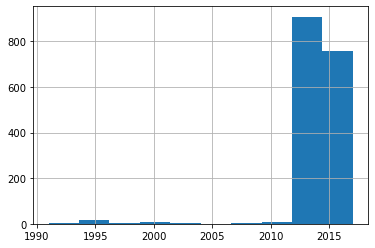

In [56]:
dfu.iyear.hist()

In [60]:
?sns.barplot

In [92]:
#x=dfu.iyear.value_counts()
#y=dfu.eventid.value_counts()

stats = list(dfu.iyear.value_counts())

sns.boxplot(data=stats)

#x=dfu.iyear.value_counts(), y=dfu.eventid.value_counts(),

AttributeError: 'list' object has no attribute 'get'

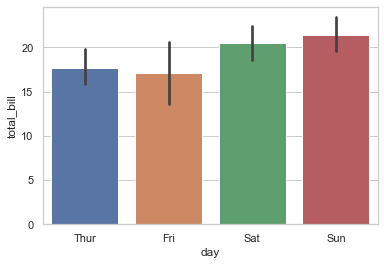

In [82]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

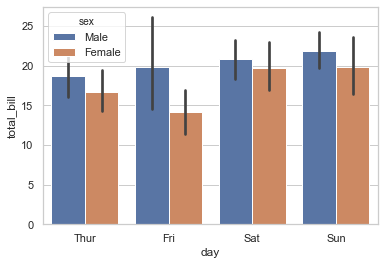

In [93]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

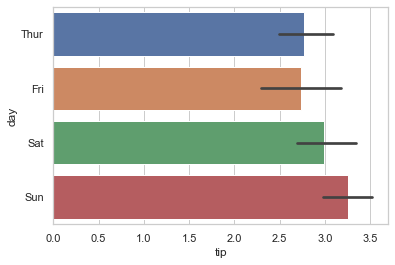

In [94]:
ax = sns.barplot(x="tip", y="day", data=tips)